In [ ]:
import numpy as np
from matplotlib import pyplot as plt
def get_data(data):
    n = []
    e = []
    err = []
    for line in data.splitlines():
        if len(line) > 0:
            m = [int(line.split()[0])]
            n = np.hstack((n,m))
            energy = [float(line.split()[-3])]
            e = np.hstack((e,energy))
            error = [float(line.split()[-1])]
            err = np.hstack((err,error))
    e_per = e/n
    err_per = err/n
    return n,e_per,err_per

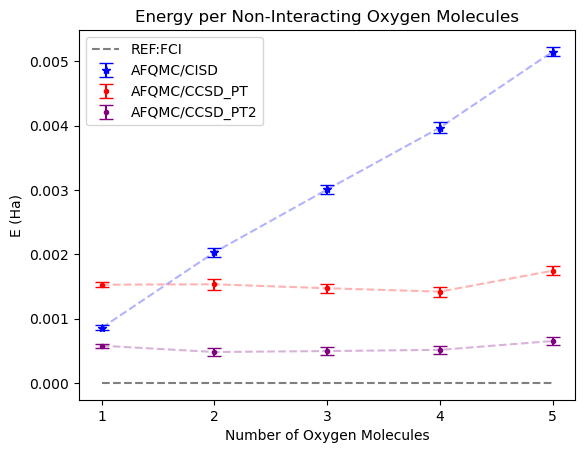

In [ ]:
# O2
ref = -149.162950324841 # CASCI 
# data_ref = '''
# 1   -149.162950324841 0
# 2   {2}*-149.162950324841 0
# 3   {3}*-149.162950324841 0
# 4   {4}*-149.162950324841 0
# 5   {5}*-149.162950324841 0
# '''
data1 = '''
1  AFQMC energy: -149.162094 +/- 0.000040
2  AFQMC energy: -298.321838 +/- 0.000135
3  AFQMC energy: -447.479828 +/- 0.000225
4  AFQMC energy: -596.635925 +/- 0.000337
5  AFQMC energy: -745.789001 +/- 0.000370
'''
data2 = '''
1  AFQMC/CCSD_PT energy: -149.161423 +/- 0.000039
2  AFQMC/CCSD_PT energy: -298.322834 +/- 0.00017
3  AFQMC/CCSD_PT energy: -447.484434 +/- 0.000201
4  AFQMC/CCSD_PT energy: -596.646125 +/- 0.000315
5  AFQMC/CCSD_PT energy: -745.806030 +/- 0.000337
'''
data3 = '''
1  AFQMC/CCSD_PT2 energy: -149.162372 +/- 0.000031
2  AFQMC/CCSD_PT2 energy:  -298.324939 +/- 0.000139
3  AFQMC/CCSD_PT2 energy: -447.487364 +/- 0.000191
4  AFQMC/CCSD_PT2 energy: -596.649745 +/- 0.000236
5  AFQMC/CCSD_PT2 energy: -745.811494 +/- 0.000341
'''
n1,e_per1,err_per1 = get_data(data1)
n2,e_per2,err_per2 = get_data(data2)
n3,e_per3,err_per3 = get_data(data3)
plt.errorbar(n1,e_per1-ref,yerr=err_per1,fmt='*--', color='C2',capsize=5,label='AFQMC/CISD')
plt.errorbar(n2,e_per2-ref,yerr=err_per2,fmt='.--', color='C3', capsize=5,label='AFQMC/CCSD_PT')
plt.errorbar(n3,e_per3-ref,yerr=err_per3,fmt='.--', color='C4',capsize=5,label='AFQMC/CCSD_PT2')
plt.plot(n1,[0]*len(n1),'--',color='black', label='Ref: FCI')
plt.xticks(n1) 
plt.xlabel('Number of Molecules')
plt.ylabel('Energy (Ha)')
plt.title('Energy per O$_2$')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['AFQMC/CISD', 'AFQMC/CCSD_PT', 'AFQMC/CCSD_PT2', 'Ref: FCI']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels, loc='upper right', bbox_to_anchor=(0.94, 1))
plt.show()